## Zadanie 1

In [6]:
import pandas as pd
import numpy as np
 
from sklearn import svm
 
import matplotlib.pyplot as plt

In [7]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))


In [8]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

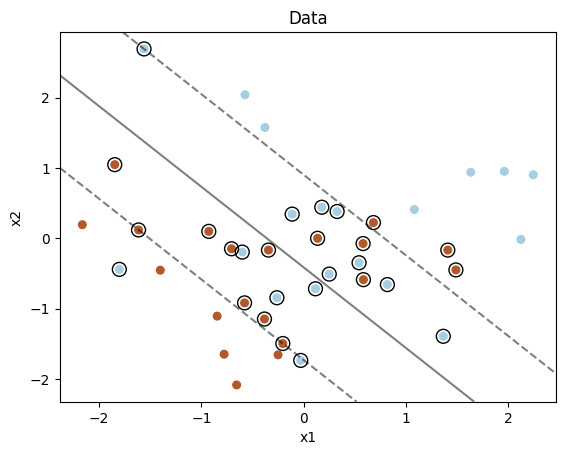

In [9]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

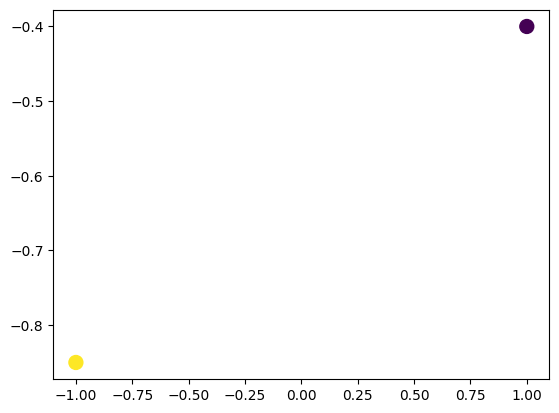

In [10]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [11]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62900794 0.37099206]
 [0.26314362 0.73685638]]


## Zadanie 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


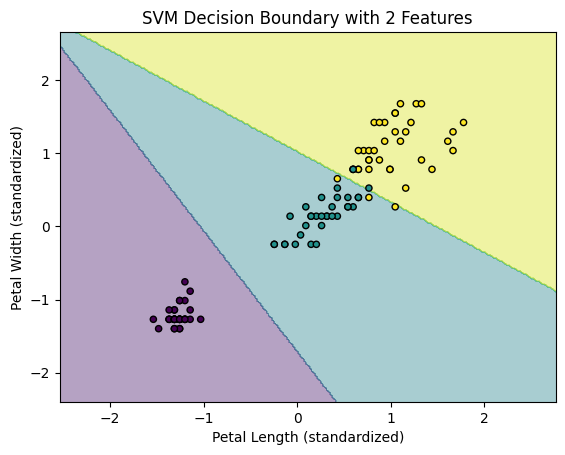

Dokładność klasyfikacji: 0.95556


In [14]:

# Wczytanie zbioru danych iris
iris = datasets.load_iris()
X_2d = iris.data[:, 2:4]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='linear', C=1, random_state=1)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

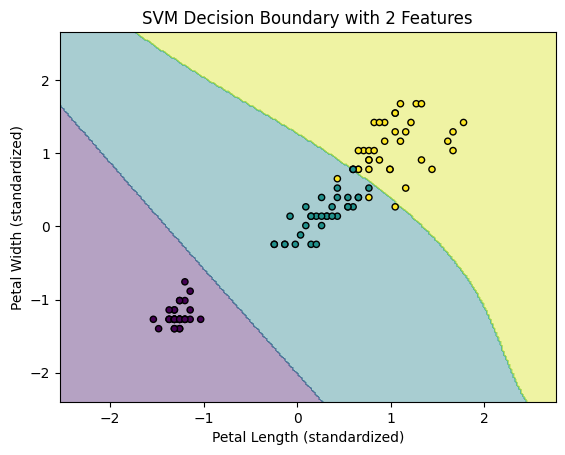

Dokładność klasyfikacji: 0.97778


In [15]:
iris = datasets.load_iris()
X_2d = iris.data[:, 2:4]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='poly', C=1, random_state=1)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

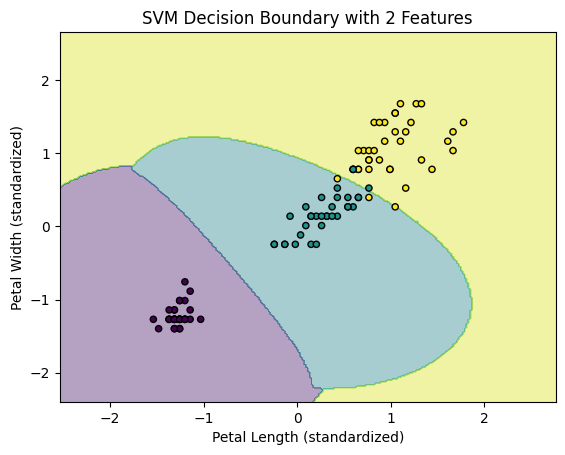

Dokładność klasyfikacji: 0.95556


In [16]:
iris = datasets.load_iris()
X_2d = iris.data[:, 2:4]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='rbf', C=1, random_state=1)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

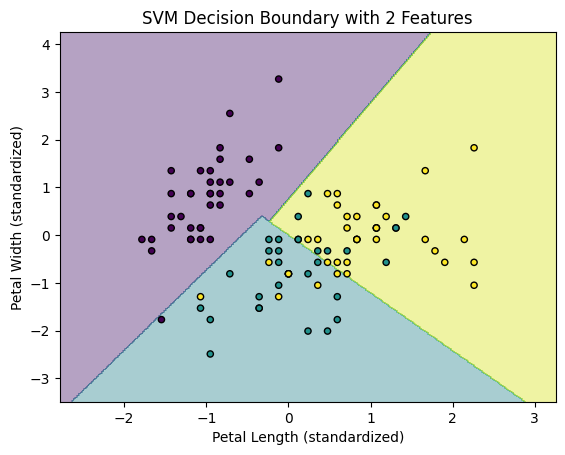

Dokładność klasyfikacji: 0.77778


In [17]:
iris = datasets.load_iris()
X_2d = iris.data[:, 0:2]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='linear', C=1, random_state=1)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

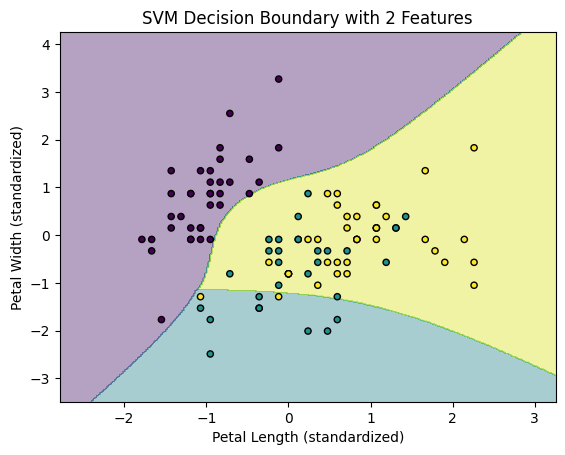

Dokładność klasyfikacji: 0.64444


In [18]:
iris = datasets.load_iris()
X_2d = iris.data[:, 0:2]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='poly', C=1, random_state=1)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

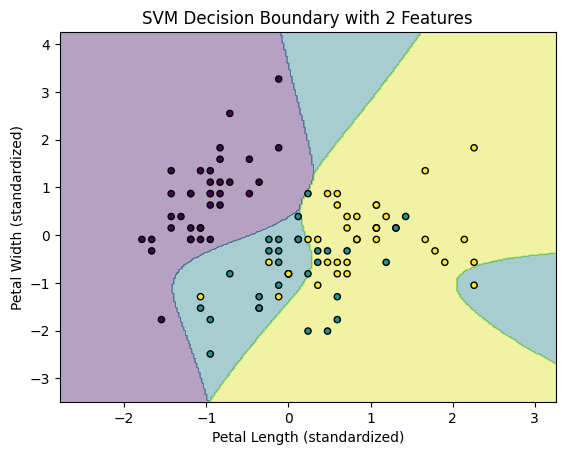

Dokładność klasyfikacji: 0.80000


In [21]:
iris = datasets.load_iris()
X_2d = iris.data[:, 0:2]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='sigmoid', C=1, random_state=1)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

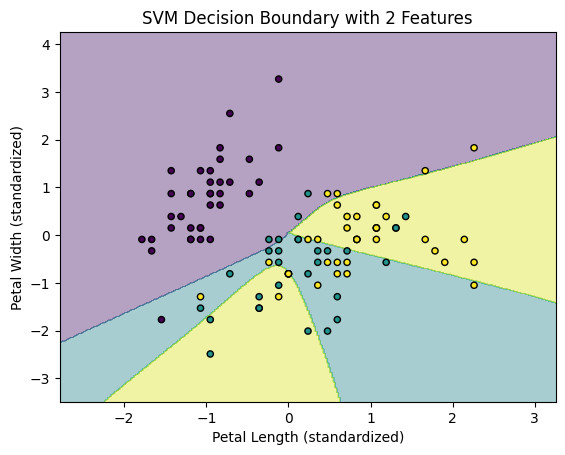

Dokładność klasyfikacji: 0.57778


In [23]:
iris = datasets.load_iris()
X_2d = iris.data[:, 0:2]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='sigmoid', C=1, random_state=1, gamma=3)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")

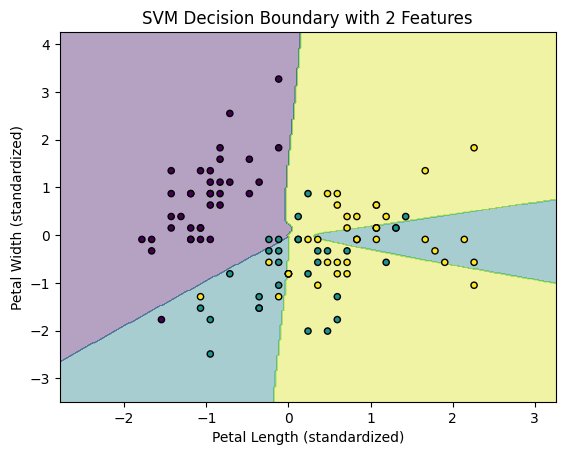

Dokładność klasyfikacji: 0.68889


In [4]:
iris = datasets.load_iris()
X_2d = iris.data[:, 0:2]  
y_2d = iris.target
df = pd.DataFrame(X_2d, columns=iris.feature_names[2:])
# df['target'] = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=1)

# # Normalizacja cech
scaler_2d = StandardScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)
# 
# # Utworzenie i trenowanie modelu SVM
clf_2d = SVC(kernel='sigmoid', C=1, random_state=1,gamma=10)
clf_2d.fit(X_train_scaled_2d, y_train_2d)
# 
# # Wizualizacja obszaru decyzyjnego
x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 
Z = clf_2d.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with 2 Features')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()

accuracy = clf_2d.score(X_test_scaled_2d, y_test_2d)
print(f"Dokładność klasyfikacji: {accuracy:.5f}")